In [20]:
# Import bibliotek
# Podstawy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data split
from sklearn.model_selection import train_test_split

#ML
# ALGORYTMY
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# GridSearch i Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

# Ocena
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from yellowbrick.classifier import ROCAUC
from mlxtend.plotting import plot_decision_regions

In [21]:
plt.rcParams["figure.figsize"] = (20,10)

In [25]:
db = pd.read_csv('dataset_5secondWindow%5B3%5D.csv')

In [26]:
learning_data = db.copy()
learning_data['time'] = learning_data['time'].astype(int)
y = learning_data['target']
X = learning_data.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
def teach_and_check_scores(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    preds_proba = model.predict_proba(X_test)    
    
    print(classification_report(y_test, preds))
    
    print(f'ROC AUC SCORE: {roc_auc_score(y_test, preds_proba, multi_class="ovr")}')

    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [28]:
num_feat = X_train.columns

num_prep = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('scaler_1', StandardScaler())
])

data_prep = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_prep, num_feat)
])

In [29]:
forest_clf = Pipeline(steps=[('preprocessor', data_prep),
                           ('model', RandomForestClassifier())])

In [16]:
params = {
    'model__max_leaf_nodes': [2, 3, 5],
    'model__max_depth': [1, 2, 3, 5],
    'model__n_jobs': [-1],
    'model__random_state': [None, 42],
}

grid_search = GridSearchCV(forest_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
forest_v1 = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wybrane hiperparametry:  {'model__max_depth': 5, 'model__max_leaf_nodes': 5, 'model__n_jobs': -1, 'model__random_state': None}


              precision    recall  f1-score   support

         Bus       0.49      0.44      0.46       189
         Car       0.65      0.49      0.56       243
       Still       0.71      0.84      0.77       248
       Train       0.56      0.66      0.60       243
     Walking       0.88      0.85      0.87       256

    accuracy                           0.67      1179
   macro avg       0.66      0.66      0.65      1179
weighted avg       0.67      0.67      0.66      1179

ROC AUC SCORE: 0.9169812009144328


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


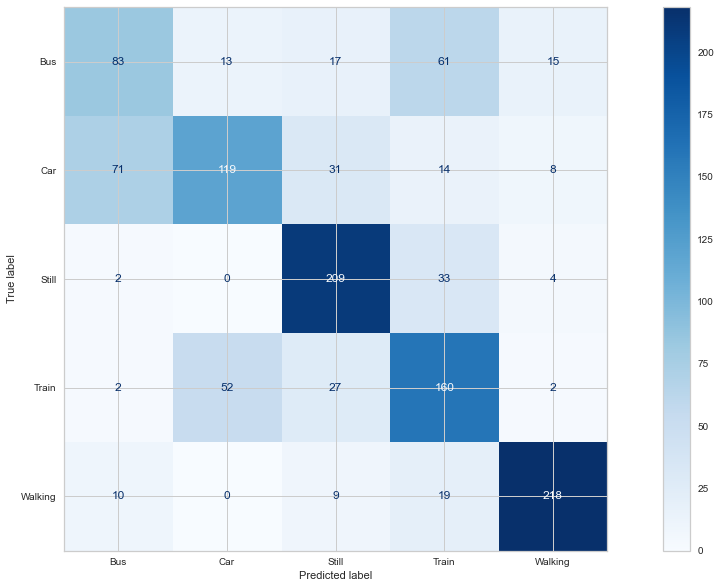

In [17]:
teach_and_check_scores(X_train, y_train, X_test, y_test, forest_v1)

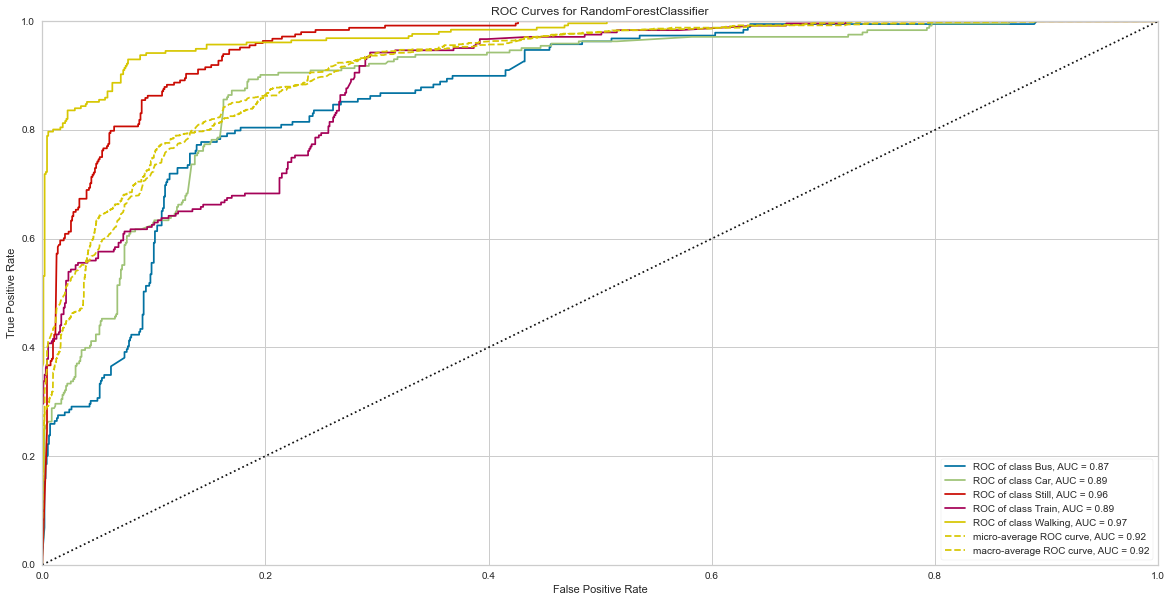

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
visualizer = ROCAUC(forest_v1, classes=np.unique(y_test))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Model wykorzystujący wszystkie, nieprzetworzone dane osiągnął zadowalający wynik.

Sprawdźmy jaki wynik osiągnie po usunięciu outlierów oraz powtarzających się wartości.

In [30]:
db.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,android.sensor.gyroscope#mean,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,0.001651,...,0.002109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,0.036326,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,0.001525,...,0.011312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,0.036440,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,0.183202,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,0.000000,Car


In [31]:
new_db = db.query('android.sensor.accelerometer#min < android.sensor.accelerometer#min.quantile(.90)')

UndefinedVariableError: name 'android' is not defined

In [ ]:
new_db = new_db.query('ASG_MIN < ASG_MIN.quantile(.90)')

In [ ]:
new_db = new_db.query('SND_MAX < SND_MAX.quantile(.90)')

In [ ]:
new_db = db.query('ASG_MIN != ASG_MAX')